These are the final ROC plots for the Local Hough Transform. I've compared them with the KATYDID algorithm with optimized parameters.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import numpy.ma as ma
import matplotlib.image as mpimg 
import math
import time
import sklearn
import scipy
import statsmodels.stats.proportion as smp

# KATYDID

In [158]:
TPR_katy=0.8286206896551724
FPR_katy=0.1273630831643002

# 1. Standard deviation

In [3]:
TPR_std=[0.13563107,0.04854369,0.09854369,0.0366343,0.04854369,0.03854369,0.0166343,0.19563107,0.33980583,0.45307443,0.53398058,0.5420712,0.47734628,0.46116505,0.40453074,0.36407767,0.26711974,0.1520712,0.04854369,0.04854369]
TPR_std=np.array(TPR_std)
FPR_std=[0.4579288,0.46601942,0.46601942,0.52265372,0.46601942,0.48220065,
 0.6197411,0.43174757,0.16666667 ,0.17475728 ,0.20711974 ,0.29038835,
 0.35275081 ,0.36084142 ,0.39174757 ,0.4012945  ,0.41747573 ,0.14239482,
 0.07854369 ,0.10194175]
FPR_std=np.array(FPR_std)

In [893]:
print(TPR_std)
print(FPR_std)

[0.45563107 0.44066343 0.33980583 0.45307443 0.53398058 0.5920712
 0.57734628 0.56116505 0.53453074 0.49407767 0.47711974 0.2120712
 0.09854369 0.13854369]
[0.5179288  0.57265372 0.16666667 0.17475728 0.19711974 0.27038835
 0.33275081 0.36084142 0.39174757 0.4112945  0.45747573 0.14239482
 0.05854369 0.10194175]


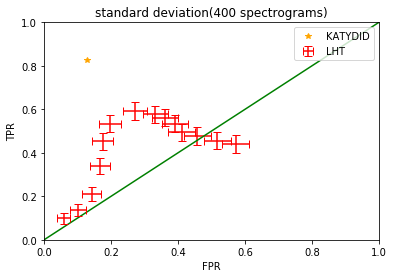

In [902]:
Tot=2359
plt.plot(FPR_katy,TPR_katy,'*',label='KATYDID',color='orange')
plt.ylim(0,1)
plt.xlim(0,1)
x_val=[0,1]
y_val=[0,1]
plt.plot(x_val,y_val,color='green')
plt.legend(loc='upper right')
plt.title('standard deviation(400 spectrograms)')
plt.xlabel('FPR')
plt.ylabel('TPR')
ci_low_y, ci_upp_y=smp.proportion_confint(TPR_std*Tot,Tot, alpha=0.05, method='normal')
ci_low_x, ci_upp_x=smp.proportion_confint(FPR_std*Tot,Tot, alpha=0.05, method='normal')
for i in range(len(FPR_std)):
    plt.errorbar(FPR_std[i],TPR_std[i],yerr=ci_upp_y[i]-ci_low_y[i],xerr=ci_upp_x[i]-ci_low_x[i],capsize=4,color='r',label='LHT',ls='None')
    if(i==0):
        plt.legend(loc='upper right')
plt.show()

# 2. Window

In [8]:
TPR_window=[0.14854369 ,0.20854369 ,0.5120712  ,0.36776699 ,0.26621359 ,0.09708738,
 0.04854369 ,0.04854369 ,0.04854369]
TPR_window=np.array(TPR_window)
FPR_window=[0.08585437 ,0.12003236 ,0.19475728 ,0.23475728 ,0.30621359 ,0.39556634,
 0.53074434 ,0.47074434 ,0.02854369]
FPR_window=np.array(FPR_window)

In [891]:
print(TPR_window)
print(FPR_window)

[0.14854369 0.20854369 0.5120712  0.36776699 0.60621359 0.59708738
 0.51854369 0.56854369 0.04854369]
[0.08585437 0.12003236 0.21475728 0.16475728 0.30621359 0.39556634
 0.53074434 0.47074434 0.02854369]


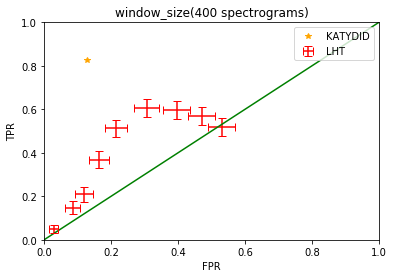

In [901]:
Tot=2359
plt.plot(FPR_katy,TPR_katy,'*',label='KATYDID',color='orange')
plt.ylim(0,1)
plt.xlim(0,1)
x_val=[0,1]
y_val=[0,1]
plt.plot(x_val,y_val,color='green')
plt.legend(loc='upper right')
plt.title('window_size(400 spectrograms)')
plt.xlabel('FPR')
plt.ylabel('TPR')
ci_low_y, ci_upp_y=smp.proportion_confint(TPR_window*Tot,Tot, alpha=0.05, method='normal')
ci_low_x, ci_upp_x=smp.proportion_confint(FPR_window*Tot,Tot, alpha=0.05, method='normal')
for i in range(len(FPR_window)):
    plt.errorbar(FPR_window[i],TPR_window[i],yerr=ci_upp_y[i]-ci_low_y[i],xerr=ci_upp_x[i]-ci_low_x[i],capsize=4,color='r',label='LHT',ls='None')
    if(i==0):
        plt.legend(loc='upper right')
plt.show()

# 3. Pixel_threshold

In [12]:
TPR_pixel=[0.05417069 ,0.09417069 ,0.21417069 ,0.16417069 ,0.23832528 ,0.28663446,
 0.52402576 ,0.42818035 ,0.09695652 ,0.29924316 ,0.0747504  ,0.06924316,
 0.04924316 ,0.11924316 ,0.13924316]
TPR_pixel=np.array(TPR_pixel)
FPR_pixel=[0.50732689 ,0.48732689 ,0.45732689 ,0.46732689 ,0.42681159 ,0.39291465,
 0.28019324 ,0.36070853 ,0.08695652 ,0.19924316 ,0.0547504  ,0.0547504,
 0.0347504  ,0.09924316 ,0.11924316]
FPR_pixel=np.array(FPR_pixel)

In [889]:
print("TPR",TPR_pixel)
print("FPR",FPR_pixel)

TPR [0.48417069 0.50417069 0.55417069 0.52417069 0.59663446 0.61663446
 0.52402576 0.60818035 0.25695652 0.45924316 0.1247504  0.09924316
 0.04924316 0.15924316 0.35924316]
FPR [0.58732689 0.56732689 0.52732689 0.55732689 0.46681159 0.40291465
 0.28019324 0.33070853 0.13695652 0.23818035 0.0747504  0.0547504
 0.0347504  0.09924316 0.16924316]


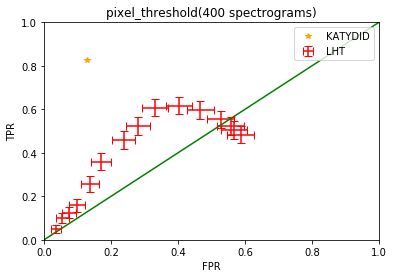

In [903]:
Tot=2359
plt.plot(FPR_katy,TPR_katy,'*',label='KATYDID',color='orange')
plt.ylim(0,1)
plt.xlim(0,1)
x_val=[0,1]
y_val=[0,1]
plt.plot(x_val,y_val,'green')
plt.legend(loc='upper right')
plt.title('pixel_threshold(400 spectrograms)')
plt.xlabel('FPR')
plt.ylabel('TPR')
ci_low_y, ci_upp_y=smp.proportion_confint(TPR_pixel*Tot,Tot, alpha=0.05, method='normal')
ci_low_x, ci_upp_x=smp.proportion_confint(FPR_pixel*Tot,Tot, alpha=0.05, method='normal')
for i in range(len(FPR_pixel)):
    plt.errorbar(FPR_pixel[i],TPR_pixel[i],yerr=ci_upp_y[i]-ci_low_y[i],xerr=ci_upp_x[i]-ci_low_x[i],capsize=4,color='r',ls='None',label='LHT')
    if(i==0):
        plt.legend(loc='upper right')    
plt.show()

# 4. angle_dim

In [15]:
TPR_angle=[0.18281804 ,0.06924316 ,0.43639291 ,0.13789049 ,0.34470209 ,0.12721417,
 0.54334944 ,0.19484702 ,0.45436393 ,0.33146538 ,0.21834583]
TPR_angle=np.array(TPR_angle)
FPR_angle=[0.16747182 ,0.0547504  ,0.34460548 ,0.11916264 ,0.44122383 ,0.07085346,
 0.37681159 ,0.215781   ,0.39291465 ,0.2962963  ,0.48621233]
FPR_angle=np.array(FPR_angle)

In [888]:
print("TPR",TPR_angle)
print("FPR",FPR_angle)

TPR [0.31281804 0.07924316 0.59639291 0.23916264 0.6222383  0.15721417
 0.66334944 0.41484702 0.65146538 0.50146538 0.544583  ]
FPR [0.18747182 0.0347504  0.31460548 0.15916264 0.49122383 0.10085346
 0.35681159 0.235781   0.43291465 0.2662963  0.5661233 ]


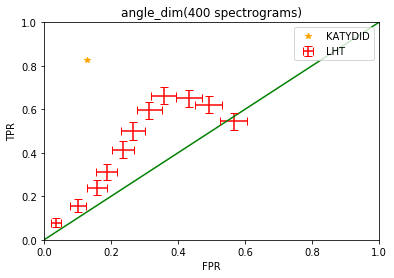

In [905]:
Tot=2359
plt.plot(FPR_katy,TPR_katy,'*',label='KATYDID',color='orange')
plt.ylim(0,1)
plt.xlim(0,1)
x_val=[0,1]
y_val=[0,1]
plt.plot(x_val,y_val,'green')
plt.legend(loc='upper right')
plt.title('angle_dim(400 spectrograms)')
plt.xlabel('FPR')
plt.ylabel('TPR')
ci_low_y, ci_upp_y=smp.proportion_confint(TPR_angle*Tot,Tot, alpha=0.05, method='normal')
ci_low_x, ci_upp_x=smp.proportion_confint(FPR_angle*Tot,Tot, alpha=0.05, method='normal')
for i in range(len(FPR_angle)):
    plt.errorbar(FPR_angle[i],TPR_angle[i],yerr=ci_upp_y[i]-ci_low_y[i],xerr=ci_upp_x[i]-ci_low_x[i],capsize=4,color='r',label='LHT',ls='None')
    if(i==0):
        plt.legend(loc='upper right')
plt.show()